In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import (
PolynomialFeatures,
) # use the fit_transform method of the created object!
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

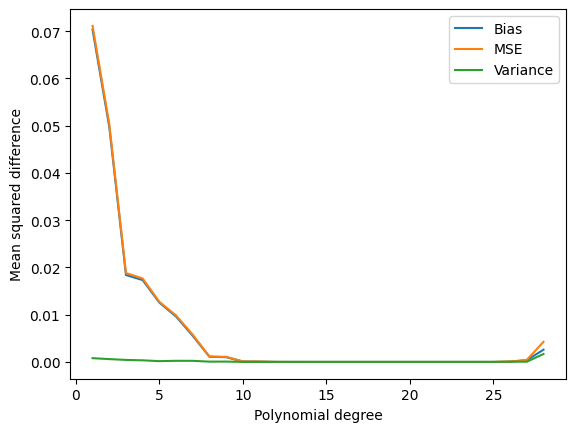

In [6]:
n = 300
bootstraps = 10
x = np.linspace(-3, 3, n)
y = np.exp(-(x**2)) + 1.5 * np.exp(-((x - 2) ** 2)) + np.random.normal(0, 0.1)
rng = np.random.RandomState(121)
biases = []
variances = []
mses = []
max_degree = 28
for p in range(1, max_degree+1):
    predictions = np.zeros((bootstraps,int(0.2*n)))
    targets = np.zeros((1,int(0.2*n)))
    X = PolynomialFeatures(degree = p,include_bias = True).fit_transform(x.reshape(-1,1))
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 42)
    targets[0,:] = y_test
    for b in range(bootstraps):
        X_train_re, y_train_re = resample(X_train, y_train,random_state = rng)
        model_fit = LinearRegression(fit_intercept = False).fit(X_train_re, y_train_re)
        predictions[b, :] = model_fit.predict(X_test).ravel()
    biases.append(np.mean((y_test - np.mean(predictions, axis=0,keepdims=True))**2))
    variances.append(np.mean(np.var(predictions, axis=0,keepdims=True)))
    mses.append(np.mean(np.mean((y_test - predictions)**2, axis=0,keepdims=True)))
plt.plot(range(1,max_degree+1),biases,label="Bias")
plt.plot(range(1,max_degree+1),mses,label="MSE")
plt.plot(range(1,max_degree+1),variances,label="Variance")
plt.legend()
plt.xlabel("Polynomial degree")
plt.ylabel("Mean squared difference")
plt.show()